In [401]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [402]:
IMG_SIZE=50
dataset=r'F:\selectedpro\image\train_dataset\train'
categories=['GS','M1','M4','M5','M6','M7',"P50",'P1',"P12",'W1']

In [403]:
training_data=[]

for c in categories:
    path=os.path.join(dataset,c)
    class_num=categories.index(c)
    for img in os.listdir(path):
        try:
            img_arrary=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_arrary,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass


In [404]:
import random
random.shuffle(training_data)

In [405]:
for sample in training_data[:4]:
    print(sample[1])
print(new_array)

1
4
1
2
[[166 166 166 ... 163 162 162]
 [166 166 166 ... 163 162 162]
 [166 166 166 ... 162 162 162]
 ...
 [ 74  35  29 ...  35  41  40]
 [ 77  54  49 ...   8   5  14]
 [ 87  87 118 ...  21  16  17]]


In [406]:
X=[]
y=[]
from sklearn.model_selection import train_test_split

6348
6348


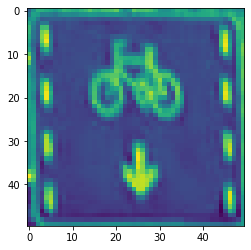

In [407]:
for feature ,label in training_data: 
    X.append(feature)
    y.append(label)
plt.imshow(X[1])
Q=X[0]/255
Q
print(len(y))
print(len(X))

In [408]:
X=np.array(X)
y=np.array(y)

In [409]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [410]:
X_train=X_train/255
X_test=X_test/255

X_train_flatten=X_train.reshape(len(X_train),50*50)
X_test_flatten=X_test.reshape(len(X_test),50*50)

In [411]:
X_test_flatten.shape

(1270, 2500)

In [412]:
X_train[0]
X_train_flatten[0]

array([0.69019608, 0.70196078, 0.71372549, ..., 0.33333333, 0.34117647,
       0.34509804])

In [413]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,input_shape=(2500,), activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
ann.compile(
    loss='sparse_categorical_crossentropy',
     metrics=['accuracy']
)
history=ann.fit(X_train_flatten, y_train,epochs=100)

Epoch 1/100
159/159 [==============================] - 1s 2ms/step - loss: 1.3017 - accuracy: 0.6052
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 1.0145 - accuracy: 0.6952
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.7052
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.8782 - accuracy: 0.7152
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.7292
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.7941 - accuracy: 0.7442
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.7319 - accuracy: 0.7615
Epoch 8/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.7824
Epoch 9/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7946
Epoch 10/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6276 - accura

In [414]:
ann.evaluate(X_test_flatten,y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.8677


[0.5854628682136536, 0.8677165508270264]

2

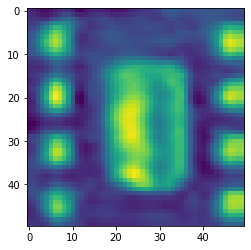

In [415]:
y_pred = ann.predict(X_test_flatten)

plt.imshow(X_test[0])
np.argmax(y_pred[0])

In [416]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [417]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
accuracy_score(y_test, y_predicted_labels)

tf.Tensor(
[[200   1  21   7   0   0   0   3   0   1]
 [  4  31   9   0   0   1   2   4   1   1]
 [ 29   3 652   4   0   3   0   1   1   4]
 [  1   0  16  27   3   1   0   1   0   0]
 [  0   2   3   3  17   0   0   0   2   0]
 [  3   2   4   0   0  76   0   0   0   4]
 [  1   1   0   0   0   0  15   0   0   1]
 [  3   1   5   1   1   0   0  48   0   0]
 [  0   0   2   1   0   0   0   0  14   1]
 [  1   0   2   1   0   1   0   0   0  22]], shape=(10, 10), dtype=int32)


0.8677165354330708

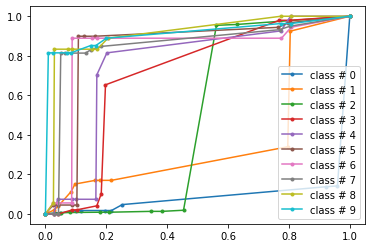

In [418]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from collections import Counter

y_pred1 = ann.predict(X_test_flatten)
y_pred1=[np.argmax(i) for i in y_pred1]




for i in range(10):
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred1, pos_label=i)
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras,marker='.'.format(), label='class # %0.f' % i)
    
plt.legend(loc="lower right")


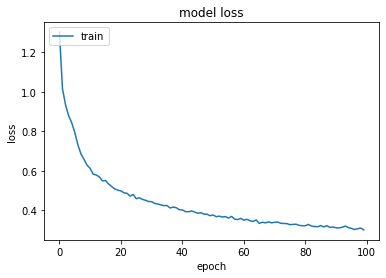

In [419]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()